In [ ]:
# randomly select k-mers Motifs = (Motif1, …, Motift) in each string
            from Dna
        BestMotifs ← Motifs
        while forever
            Profile ← Profile(Motifs)
            Motifs ← Motifs(Profile, Dna)
            if Score(Motifs) < Score(BestMotifs)
                BestMotifs ← Motifs
            else
                return BestMotifs

In [6]:
import random
from numpy import *
import numpy as np
import time
start_time = time.time()


#--


def Profile_most(Text,k,Profile):
    max_score=0
    most_probable_kmer=Text[0:0+k]
    for n in range(0,len(Text)-(k-1)):
        kmer=Text[n:n+k]
        score=1
        for i in range(0,len(kmer)):
            probaN=Profile[PatternToNumber(kmer[i])][i]
            score *= probaN
        if score>max_score:
            max_score=score
            most_probable_kmer=kmer

    return(most_probable_kmer)
#--
def HammingDistance(p,q):
    HamDi=int(0)
    for i in range(len(p)):
        if p[i]==q[i]:
            continue
        else:
            HamDi+=+1
    return(HamDi)
#--
def NumberToPattern(Number, k):
    d={'A':0,'C':1,'G':2,'T':3}
    pattern=[]
    if k==1:
        #return d.keys()[d.values().index(Number)]
        return (list(d.keys())[list(d.values()).index(int(Number))])
    prefixIndex = Number//4
    r = Number%4
    PrefixPattern = NumberToPattern(prefixIndex, (k-1))
    symbol = (list(d.keys())[list(d.values()).index(r)])
    return (PrefixPattern+symbol)
#--
def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])
#--
def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    #return matrix_occ.sum(axis=0, dtype='float')
    return Profile_matrix  
#--
def Consensus(Profile):
    maxarg= list(Profile.argmax(0))
    Cons=''
    for posi in maxarg:
        Cons+=NumberToPattern(int(posi), 1)
    return Cons
#--
def d(Pattern, Dna):
    score=0
    k=len(Pattern)
    for i in range(0,len(Dna)):
        Hamdist={}
        minDist={}
        seq=Dna[i]
        for n in range(0,len(seq)-(k-1)):
            Hamdist[seq[n:n+k]]=HammingDistance(Pattern,seq[n:n+k])
        minimum=int(min(Hamdist.values()))
        score+=minimum
    return(score)
#--
def Motifs(Profile,Dna):
    Motifs=list()
    for n in range(len(Dna)):
        Motifs.append(Profile_most(Dna[n],k,Profile))
    return Motifs 
#--

from collections import Counter
def score(motifs):
    # change to motifs as list of columns instead of list of rows
    matrix = [[] for k in range(len(motifs[0]))]
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            matrix[i].append(motifs[j][i])
    score = 0
    #print matrix
    for col in range(len(matrix)):
        # count letters in a column, delete most common letter, sum remaining
        c = Counter(matrix[col])
        #print c
        del c[c.most_common(1)[0][0]]
        score += sum(c.values())
    return score

############################################################
#f = open('/Users/juniper_admin/Desktop/dataset_161_5.txt','r')
f = open('../../Downloads/rosalind_ba2f.txt','r')

lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
Dna=lines[1:]
#print(k,t,Dna)
#print len(Dna[0])
#Dna=['AAGCCAAA','AATCCTGG','GCTACTTG','ATGTTTTG']
######################################
def RANDOMIZEDMOTIFSEARCH(Dna, k, t):
    Motifs=list()
    for n in range(len(Dna)):
        rdm_posi=random.randint(0, (len(Dna[n])-(k)))
        Motifs.append(Dna[n][rdm_posi:rdm_posi+k])
    BestMotifs=Motifs
    BestMotifs_score= score(BestMotifs)
    #print BestMotifs

    while True:
        Profile=MakeProfile(Motifs)
        Motifs=list()
        for n in range(len(Dna)):
            Motifs.append(Profile_most(Dna[n],k,Profile))
        Motif_score= score(Motifs)
        if Motif_score < score(BestMotifs):
                BestMotifs=Motifs
                BestMotifs_score=Motif_score
        else:
            return BestMotifs,Motif_score
dic={}
minscore=float(inf)
iteration=0
maxit=0

while iteration <150:
    it=RANDOMIZEDMOTIFSEARCH(Dna, k, t)
    if it[1]<minscore:
        minscore=it[1]
        result=it[0]
        maxit=iteration
        iteration+=1
        
    else:
        #print(iteration)
        iteration+=1
#print(result)        
print'\n'.join(result)
print(minscore,maxit)

print ('The script took '+str(time.time()-start_time)+' s')
'''while iteration <500:
    it=RANDOMIZEDMOTIFSEARCH(Dna, k, t)
    score=d(Consensus(MakeProfile(it)), it)
    dic[iteration]=score
    dic[iteration]=it
    iteration +=1
    print iteration'''
#print('\n'.join(result))        
        
        
''' TCTCGGGG
     CCAAGGTG
     TACAGGCG
     TTCAGGTG
     TCCACGTG'''        

AAAAAGTAGAGGGCC
AAGGTTTAGGATTTC
CAGAAATAGGATTGA
GCGAAATAGGATTTA
AAGAAATATAGTTTC
AAGAAATAGGGCGTC
AAGACCAAGGATTTC
ATTCAATAGGATTTC
AAGAAATAGATGTTC
AAGAAATAGGACGGC
AAGAATCTGGATTTC
AAGAAATAGGATGCA
AAGAAATTCTATTTC
AAGAAAACAGATTTC
AAGGTGTAGGATTTC
AAGAGGCAGGATTTC
AAGAAAAGAGATTTC
CTAAAATAGGATTTC
AAGAAGACGGATTTC
AATTCATAGGATTTC
(64, 53)
The script took 79.5685219765 s


' TCTCGGGG\n     CCAAGGTG\n     TACAGGCG\n     TTCAGGTG\n     TCCACGTG'

In [ ]:
'''Way faster but doesnt work'''

from random import randrange
import time
start_time = time.time()



def createMotifs(profile, dna_list, k):
    motifs = []
    for strand in dna_list:
        motifs.append(profileMostProbKmer(strand,k,profile))
    return motifs

def profileMotifs(motifs,k):
    # construct profile-matrix (each column as an dict) from count-matrix
    profile = countMotifs(motifs,k)
    for d in profile:
        for key in d: d[key] /= (len(motifs)+4) # +4 due to pseudocounts
    return profile

def countMotifs(motifs,k):
    # counter-matrix: a list of dicts for each column in motifs-matrix
    counter = [{"A":1,"C":1,"G":1,"T":1} for x in range(k)] # start with pseudocounts
    for i in range(k):
        for j in range(len(motifs)):
            letter = motifs[j][i]
            counter[i].update({letter:1+counter[i][letter]})                
    return counter

def profileMostProbKmer(strand, k, profile):
    mp_kmer, max_prob = "", -1
    for i in range(len(strand)-k+1):
        kmer = strand[i:i+k]
        prob = 1
        for j in range(k):
            prob *= profile[j].get(kmer[j],0)
        if prob > max_prob:
            max_prob = prob
            mp_kmer = kmer
    return mp_kmer

from collections import Counter
def score(motifs):
    # change to motifs as list of columns instead of list of rows
    matrix = [[] for k in range(len(motifs[0]))]
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            matrix[i].append(motifs[j][i])
    score = 0
    for col in range(len(matrix)):
        # count letters in a column, delete most common letter, sum remaining
        c = Counter(matrix[col])
        del c[c.most_common(1)[0][0]]
        score += sum(c.values())
    return score

def RandomizedMotifSearch(dna_list, k):
    motifs=list()
    for n in range(len(Dna)):
        rdm_posi=random.randint(0, (len(Dna[n])-(k)))
        motifs.append(Dna[n][rdm_posi:rdm_posi+k])
    best_motifs=motifs
    best_score= score(best_motifs)
    while True:
        profile = profileMotifs(motifs,k)
        motifs = createMotifs(profile, dna_list, k)
        motifs_score = score(motifs)
        if motifs_score < score(best_motifs):
            best_motifs = motifs
            best_score = motifs_score
        else:
            return [best_motifs, best_score]
############################################################################################
#f = open('/Users/juniper_admin/Desktop/dataset_161_5.txt','r')
f = open('../../Downloads/rosalind_ba2f.txt','r')

lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
Dna=lines[1:]
#print(k,t,Dna)
#print len(Dna[0])

dic={}
minscore=float('inf')
iteration=0
maxit=0
while iteration <1000:
    it=RandomizedMotifSearch(Dna, k)
    if it[1]<minscore:
        minscore=it[1]
        result=it[0]
        maxit= iteration
        iteration+=1
    else:
        #print(iteration)
        iteration+=1

#print result        
print'\n'.join(result)
#print(minscore)
print ('The script took '+str(time.time()-start_time)+' s')


In [38]:
'''EXERCISE BREAK: Compute the probability that ten randomly selected 15-mers from the ten 600-nucleotide 
long strings in the Subtle Motif Problem capture at least one implanted 15-mer. (Allowable error: 0.000001)'''
from __future__ import division
strings=10
k=15
lenstr=600
nkmers=lenstr-(k-1)
#print nkmers
p=(nkmers-1)/(nkmers)
#print p
P0=(p**strings)

print P0

#-------------
P1= 10* ((1/586))*((585/586)**9)
print P1
P2=1-P1-P0
print P2

0.983065603071
0.0168045402234
0.000129856705676


[0.16666666666666666, 0.3333333333333333, 0.4999999999999999]
[1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2]


(array([ 13.,   0.,   0.,   0.,   0.,  39.,   0.,   0.,   0.,  48.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

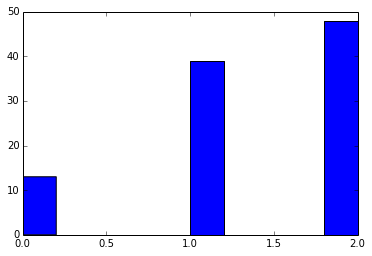

In [ ]:
'''    GIBBSSAMPLER(Dna, k, t, N)
        randomly select k-mers Motifs = (Motif1, …, Motift) in each string
            from Dna
        BestMotifs ← Motifs
        for j ← 1 to N
            i ← Random(t)
            Profile ← profile matrix constructed from all strings in Motifs
                       except for Motifi
            Motifi ← Profile-randomly generated k-mer in the i-th sequence
            if Score(Motifs) < Score(BestMotifs)
                BestMotifs ← Motifs
        return BestMotifs'''

In [561]:
import random
from numpy import *
import numpy as np
from collections import Counter


def score(motifs):
    # change to motifs as list of columns instead of list of rows
    matrix = [[] for k in range(len(motifs[0]))]
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            matrix[i].append(motifs[j][i])
    score = 0
    for col in range(len(matrix)):
        # count letters in a column, delete most common letter, sum remaining
        c = Counter(matrix[col])
        del c[c.most_common(1)[0][0]]
        score += sum(c.values())
    return score

def Pr(kmer,Profile):
    score=1
    for i in range(0,len(kmer)):
        probaN=Profile[PatternToNumber(kmer[i])][i]
        score *= probaN
    return score

def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    #return matrix_occ.sum(axis=0, dtype='float')
    return Profile_matrix  

def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])

def Random(Motif_list,Profile):
    Array=list()
    for motif in Motif_list:
        Array.append(Pr(motif,Profile))
    PArray=[v/sum(Array) for v in Array]
    i = np.random.choice( len(PArray), p=PArray)
    return i


f = open('/Users/juniper_admin/Desktop/motifen.txt','r')
lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
Dna=lines[1:]
print Dna
w=0
while w < 20:
    
    #get first set of Motifs 
    Motifs=list()
    for n in range(len(Dna)):
        rdm_posi=random.randint(0, (len(Dna[n])-(k)))
        Motifs.append(Dna[n][rdm_posi:rdm_posi+k])
    BestMotifs=Motifs
    BestScore=score(Motifs)
    Overallbest=BestMotifs
    x=0
    while x < N:
        i=(Random(Motifs,MakeProfile(Motifs)))
        #print i
        #print Motifs, len(Motifs)
        #print Motifs[i]
        Motifs.remove(Motifs[i])
        Profile_sans=MakeProfile(Motifs)
        #print Motifs,len(Motifs)
        #print Profile_sans
        Motifs_i=list()
        for n in range(len(Dna[i])-(k-1)):
            Motifs_i.append(Dna[i][n:n+k])
        ii=Random(Motifs_i,Profile_sans)    
        kmer_i= Motifs_i[ii]  
        #print Motifs_i,ii, len(Motifs_i)
        #print kmer_i
        Motifs.append(kmer_i)
        #print Motifs
        #print score(Motifs), BestScore
        if score(Motifs)<BestScore:
            BestScore=score(Motifs)
            BestMotifs=Motifs
        x+=1    
        
        if score(BestMotifs)<score(Overallbest):
            Overallbest=BestMotifs
        w+=1
print Overallbest, score(Overallbest)

['CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA', 'GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG', 'TAGTACCGAGACCGAAAGAAGTATACAGGCGT', 'TAGATCAAGTTTCAGGTGCACGTCGGTGAACC', 'AATCCACCAGCTCCACGTGCAATGTTGGCCTA']
['CCAAGGTG', 'GTTTCAGG', 'CGTCGGTG', 'GCTCCACG', 'AGATCAAG'] 18.0


In [77]:
results=['TCTCGGGG','CCAAGGTG','TACAGGCG','TTCAGGTG','TCCACGTG']
print score(results)

9.0


In [564]:
import random
from numpy import *
import numpy as np
from collections import Counter


def score(motifs):
    # change to motifs as list of columns instead of list of rows
    matrix = [[] for k in range(len(motifs[0]))]
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            matrix[i].append(motifs[j][i])
    score = 0
    for col in range(len(matrix)):
        # count letters in a column, delete most common letter, sum remaining
        c = Counter(matrix[col])
        del c[c.most_common(1)[0][0]]
        score += sum(c.values())
    return score

def Pr(kmer,Profile):
    score=1
    for i in range(0,len(kmer)):
        probaN=Profile[PatternToNumber(kmer[i])][i]
        score *= probaN
    return score

def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    #return matrix_occ.sum(axis=0, dtype='float')
    return Profile_matrix  

def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])

def Random(Motif_list,Profile):
    Array=list()
    for motif in Motif_list:
        Array.append(Pr(motif,Profile))
    PArray=[v/sum(Array) for v in Array]
    i = np.random.choice( len(PArray), p=PArray)
    return i


f = open('/Users/juniper_admin/Desktop/motifen.txt','r')
lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
Dna=lines[1:]
#print Dna[0]
    


#import kmer into Dic
dic={}
for t in range(len(Dna)):
    dic[t]=list()
    for n in range(0,len(Dna[t])-(k-1)):
        dic[t].append(Dna[t][n:n+k])
print dic,Dna
z=0        
while z <20:
    #get first set of Motifs 
    Motifs=list()
    for n in range(len(Dna)):
        rdm_posi=random.randint(0, (len(Dna[n])-(k)))
        Motifs.append(Dna[n][rdm_posi:rdm_posi+k])
    #Motifs=['TAAC','GTCT','CCGG','ACTA','AGGT']    
    BestMotifs=Motifs[:]
    BestScore=score(Motifs)
    Overallbest=BestMotifs[:]

    x=0
    while x < N:
        i=(Random(Motifs,MakeProfile(Motifs)))
        #print i
        #print Motifs, len(Motifs)
        #print Motifs[i]
        #Motifs_sans=Motifs[:]
        Motifs.remove(Motifs[i])
        Profile_sans=MakeProfile(Motifs_sans)
        #print Motifs,len(Motifs)
        #print Profile_sans
        Motifs_i=dic[i]
        #print Motifs_i    
        ii=Random(Motifs_i,Profile_sans)    
        kmer_i= Motifs_i[ii]  
        #print Motifs_i,ii, len(Motifs_i)
        #print kmer_i
        Motifs.insert(i,kmer_i)
        #print Motifs, len(Motifs)
        #print score(Motifs_sans), BestScore
        if score(Motifs)<BestScore:
            BestScore=score(Motifs)
            BestMotifs=Motifs[:]
            #Motifs=Motifs_sans[:]
            #print BestMotifs, score(BestMotifs),x
            x+=1    
        else:
            x+=1
    if score(Overallbest)>score(BestMotifs):
        Overallbest=BestMotifs[:]
        z+=1
    else:
        z+=1
        
print Overallbest, score(Overallbest),x

{0: ['CGCCCCTC', 'GCCCCTCT', 'CCCCTCTC', 'CCCTCTCG', 'CCTCTCGG', 'CTCTCGGG', 'TCTCGGGG', 'CTCGGGGG', 'TCGGGGGT', 'CGGGGGTG', 'GGGGGTGT', 'GGGGTGTT', 'GGGTGTTC', 'GGTGTTCA', 'GTGTTCAG', 'TGTTCAGT', 'GTTCAGTA', 'TTCAGTAA', 'TCAGTAAA', 'CAGTAAAC', 'AGTAAACG', 'GTAAACGG', 'TAAACGGC', 'AAACGGCC', 'AACGGCCA'], 1: ['GGGCGAGG', 'GGCGAGGT', 'GCGAGGTA', 'CGAGGTAT', 'GAGGTATG', 'AGGTATGT', 'GGTATGTG', 'GTATGTGT', 'TATGTGTA', 'ATGTGTAA', 'TGTGTAAG', 'GTGTAAGT', 'TGTAAGTG', 'GTAAGTGC', 'TAAGTGCC', 'AAGTGCCA', 'AGTGCCAA', 'GTGCCAAG', 'TGCCAAGG', 'GCCAAGGT', 'CCAAGGTG', 'CAAGGTGC', 'AAGGTGCC', 'AGGTGCCA', 'GGTGCCAG'], 2: ['TAGTACCG', 'AGTACCGA', 'GTACCGAG', 'TACCGAGA', 'ACCGAGAC', 'CCGAGACC', 'CGAGACCG', 'GAGACCGA', 'AGACCGAA', 'GACCGAAA', 'ACCGAAAG', 'CCGAAAGA', 'CGAAAGAA', 'GAAAGAAG', 'AAAGAAGT', 'AAGAAGTA', 'AGAAGTAT', 'GAAGTATA', 'AAGTATAC', 'AGTATACA', 'GTATACAG', 'TATACAGG', 'ATACAGGC', 'TACAGGCG', 'ACAGGCGT'], 3: ['TAGATCAA', 'AGATCAAG', 'GATCAAGT', 'ATCAAGTT', 'TCAAGTTT', 'CAAGTTTC', 'AAGTTTC

In [568]:
import random
from numpy import *
import numpy as np
from collections import Counter


def score(motifs):
    # change to motifs as list of columns instead of list of rows
    matrix = [[] for k in range(len(motifs[0]))]
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            matrix[i].append(motifs[j][i])
    score = 0
    for col in range(len(matrix)):
        # count letters in a column, delete most common letter, sum remaining
        c = Counter(matrix[col])
        del c[c.most_common(1)[0][0]]
        score += sum(c.values())
    return score

def Pr(kmer,Profile):
    score=1
    for i in range(0,len(kmer)):
        probaN=Profile[PatternToNumber(kmer[i])][i]
        score *= probaN
    return score

def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    #return matrix_occ.sum(axis=0, dtype='float')
    return Profile_matrix  

def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])

def Random(Motif_list,Profile):
    Array=list()
    for motif in Motif_list:
        Array.append(Pr(motif,Profile))
    PArray=[v/sum(Array) for v in Array]
    i = np.random.choice( len(PArray), p=PArray)
    return i


f = open('/Users/juniper_admin/Desktop/motifen.txt','r')
lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
Dna=lines[1:]
print Dna

#DNA array
dic={}
for t in range(len(Dna)):
    dic[t]=list()
    for n in range(0,len(Dna[t])-(k-1)):
        dic[t].append(Dna[t][n:n+k])    
#get first set of Motifs 
Motifs=list()
for n in range(len(Dna)):
    rdm_posi=random.randint(0, (len(dic[key])))                      
    Motifs.append(dic[key][rdm_posi])
    BestMotifs=Motifs[:]
    Bestscore=int(score(BestMotifs))     
#print BestMotifs,score(Motifs)
#Overallbest=BestMotifs


        
###        

x=0
while x < 10:
    i=(Random(Motifs,MakeProfile(Motifs)))
    print Motifs, len(Motifs), Motifs[i]
    #Motifs_sans=Motifs[:]
    #print Motifs_sans,Motifs
    #Motifs_sans.remove(Motifs_sans[i])
    Motifs.remove(Motifs[i])
    print Motifs,Motifs[i]
    #print Motifs_sans,Motifs
    Profile_sans=MakeProfile(Motifs)
    #print Motifs,len(Motifs)
    #print Profile_sans
    Motifs_i=dic[i]
    #print Motifs_i
    ii=Random(Motifs_i,Profile_sans)    
    kmer_i= Motifs_i[ii]  
    #print Motifs_i,ii, len(Motifs_i)
    #print kmer_i
    #Motifs_sans.insert(i,kmer_i)
    Motifs.insert(i,kmer_i)
    #print Motifs, len(Motifs)
    sM=score(Motifs)
    print sM , BestScore
    if sM < BestScore:
        BestScore=sM
        BestMotifs=Motifs_sans[:]
        print BestMotifs, sM,BestScore, x
        x+=1
    else: 
        x+=1
        #print BestMotifs, score(BestMotifs),x
print BestMotifs, score(BestMotifs),x

 ['CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA', 'GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG', 'TAGTACCGAGACCGAAAGAAGTATACAGGCGT', 'TAGATCAAGTTTCAGGTGCACGTCGGTGAACC', 'AATCCACCAGCTCCACGTGCAATGTTGGCCTA']
['TGTTGGCC', 'GTTGGCCT', 'CACCAGCT', 'GCTCCACG', 'ATCCACCA'] 5 TGTTGGCC
['GTTGGCCT', 'CACCAGCT', 'GCTCCACG', 'ATCCACCA'] GTTGGCCT
18.0 10.0
['GGTGTTCA', 'GTTGGCCT', 'CACCAGCT', 'GCTCCACG', 'ATCCACCA'] 5 GCTCCACG
['GGTGTTCA', 'GTTGGCCT', 'CACCAGCT', 'ATCCACCA'] ATCCACCA
19.0 10.0
['GGTGTTCA', 'GTTGGCCT', 'CACCAGCT', 'CAGGTGCA', 'ATCCACCA'] 5 CAGGTGCA
['GGTGTTCA', 'GTTGGCCT', 'CACCAGCT', 'ATCCACCA'] ATCCACCA
17 10.0
['GGTGTTCA', 'GTTGGCCT', 'CACCAGCT', 'GTCGGTGA', 'ATCCACCA'] 5 GTCGGTGA
['GGTGTTCA', 'GTTGGCCT', 'CACCAGCT', 'ATCCACCA'] ATCCACCA
17.0 10.0
['GGTGTTCA', 'GTTGGCCT', 'CACCAGCT', 'GGTGAACC', 'ATCCACCA'] 5 GGTGAACC
['GGTGTTCA', 'GTTGGCCT', 'CACCAGCT', 'ATCCACCA'] ATCCACCA
19.0 10.0
['GGTGTTCA', 'GTTGGCCT', 'CACCAGCT', 'CAGGTGCA', 'ATCCACCA'] 5 GGTGTTCA
['GTTGGCCT', 'CACCAGCT', 'CAGGTGCA', 'ATCCACCA']

IndexError: list index out of range

In [277]:
''''GCGT','''
from collections import defaultdict
motifs=['TAAC','GTCT','ACTA','AGGT']

f = open('/Users/juniper_admin/Desktop/dataset_161_5.txt','r')
lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
Dna=lines[1:]

    
dic={}
for t in range(len(Dna)):
    dic[t]=list()
    for n in range(0,len(Dna[t])-(k-1)):
        dic[t].append(Dna[t][n:n+k])

print dic
print dic.remove(dic[0][0])
for key in dic.keys():
    #print dic[key][0]
    a.append(dic[key][0])
#print dic[''][0]
#print dic[0][0]
#print a
'''otifs='AAT','AAG','CCC','GGG'
print score(motifs)

print MakeProfile(Motifs)
print MakeProfile(motifs)'''

{0: ['TTAC', 'TACC', 'ACCT', 'CCTT', 'CTTA', 'TTAA', 'TAAC'], 1: ['GATG', 'ATGT', 'TGTC', 'GTCT', 'TCTG', 'CTGT', 'TGTC'], 2: ['CCGG', 'CGGC', 'GGCG', 'GCGT', 'CGTT', 'GTTA', 'TTAG'], 3: ['CACT', 'ACTA', 'CTAA', 'TAAC', 'AACG', 'ACGA', 'CGAG'], 4: ['CGTC', 'GTCA', 'TCAG', 'CAGA', 'AGAG', 'GAGG', 'AGGT']}


AttributeError: 'dict' object has no attribute 'remove'

In [342]:
from collections import defaultdict
motifs=['TAAC','GTCT','ACTA','AGGT']
print Dna
dic={}
for t in range(len(Dna)):
    dic[t]=list()
    for n in range(len(Dna[t])-(k-1)):
        dic[t].append(Dna[t][n:n+k])
print dic
print dic[0]
print dic[][0]
print dic[0][0]

SyntaxError: invalid syntax (<ipython-input-342-35744dc5ea76>, line 11)

In [374]:
result=['ACCT','ATGT','GCGT','ACGA','AGGT']
clip=result[:]
print clip
clip.remove(clip[0])
print clip
clip.insert(0,'ici')
print clip
score(result)

['ACCT', 'ATGT', 'GCGT', 'ACGA', 'AGGT']
['ATGT', 'GCGT', 'ACGA', 'AGGT']
['ici', 'ATGT', 'GCGT', 'ACGA', 'AGGT']


5

In [8]:
import random
from numpy import *
import numpy as np
from collections import Counter
from __future__ import division
import time
start=time.time()

def score(motifs):
    # change to motifs as list of columns instead of list of rows
    matrix = [[] for k in range(len(motifs[0]))]
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            matrix[i].append(motifs[j][i])
    score = 0
    for col in range(len(matrix)):
        # count letters in a column, delete most common letter, sum remaining
        c = Counter(matrix[col])
        del c[c.most_common(1)[0][0]]
        score += sum(c.values())
    return score

def Pr(kmer,Profile):
    score=1
    for n in range(len(kmer)):
        score *= Profile[n][kmer[n]]
    return score

def MakeProfile(motifs):
    # construct profile-matrix (each column as an dict) from count-matrix
    k=len(motifs[0])
    counter = [{"A":1,"C":1,"G":1,"T":1} for x in range(k)] # start with pseudocounts
    for i in range(k):
        for j in range(len(motifs)):
            letter = motifs[j][i]
            counter[i].update({letter:1+counter[i][letter]})     
    for d in counter:
        for key in d: d[key] /= (len(motifs)+4) # +4 due to pseudocounts
 
    return counter


def Random(Motif_list,Profile):
    Array=list()
    for motif in Motif_list:
        Array.append(Pr(motif,Profile))
    PArray=[v/sum(Array) for v in Array]
    i = np.random.choice(len(PArray), p=PArray)
    return i


def Profile_most(kmer_list,Profile):
    max_score=0
    most_probable_kmer=kmer_list[0]
    for kmer in kmer_list:
        score=Pr(kmer,Profile)
        if score>max_score:
            max_score=score
            most_probable_kmer=kmer

    return(most_probable_kmer)

def GIBBSSAMPLER(Dna, k, t, N, dic):
    '''
    #get first set of Motifs 
    Motifs=list()
    for key in dic:
        rdm_posi=random.randint(0, t)                      
        Motifs.append(dic[key][rdm_posi])
    BestMotifs=Motifs[:]
    Bestscore=int(score(BestMotifs))     
    x=0
    while x < N:
        i=(Random(Motifs,MakeProfile(Motifs)))
        Motifs_sans=Motifs[:]
        Motifs_sans.remove(Motifs_sans[i])
        Profile_sans=MakeProfile(Motifs_sans)
        Motifs_sans.insert(i,dic[i][Random(dic[i],Profile_sans)])
        score_Motifs=score(Motifs_sans)
        if score_Motifs < Bestscore:
            BestMotifs=Motifs_sans[:]
            Bestscore = int(score_Motifs)
            Motifs=Motifs_sans[:]
            x=x+1
        else:
            x+=1
    return BestMotifs, Bestscore
    '''
    
        #get first set of Motifs 
    Motifs=list()
    for n in range(len(Dna)):
        rdm_posi=random.randint(0, (len(Dna[n])-(k)))
        Motifs.append(Dna[n][rdm_posi:rdm_posi+k])
        BestMotifs=Motifs[:]
        BestScore=score(BestMotifs)

    ###        

    x=0
    while x < N/2:
        i=(Random(Motifs,MakeProfile(Motifs)))
        Motifs.remove(Motifs[i])
        Profile_sans=MakeProfile(Motifs)
        ii=Random(dic[i],Profile_sans)    
        Motifs_i= dic[i][ii]  
        Motifs.insert(i,Motifs_i)
        sM=score(Motifs)
        if sM < BestScore:
            BestScore=sM
            BestMotifs=Motifs[:]
            #print BestMotifs, sM,BestScore, x
            x+=1
        else: 
            x+=1
            #print BestMotifs, score(BestMotifs),x
    return BestMotifs, score(BestMotifs)

#########################################################################
#f = open('/Users/juniper_admin/Desktop/dataset_161_5.txt','r')
f = open('../../Downloads/rosalind_ba2g.txt','r')

lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
#N=100
Dna=lines[1:]
#print Dna
#dic for faster indexing of kmers
dic={}
for i in range(t):
    dic[i]=list()
    for n in range(0,len(Dna[i])-(k-1)):
        dic[i].append(Dna[i][n:n+k])

Bestsc=float('inf')
randomstart=0


while randomstart < 20:
    
    results=GIBBSSAMPLER(Dna, k, t, N,dic)
    sc=results[1]
    kmers=results[0]
    print sc
    if sc < Bestsc:
        print sc
        print("\n".join(kmers))
        Bestkmers=kmers[:]
        Bestsc=sc
        #print("\n".join(Bestkmers))
    randomstart+=1
        
    #print(Bestsc)
               

               
print('the script took '+str(time.time()-start)+'s.')

161
161
GCACTGTTGTAAGAG
ACTACCTATGATTGC
AGAGCATTATAATAC
GATGGAAACAAGTGG
GCTACTATGCATTCG
TGTCATGATGAGGGG
TGTCAAGAGCGTATT
CTTCTACACGTAGCG
TCATGATGAGTTGTT
TAGAAGAGCGTATAT
GTCATCGTCCAGGAG
TAGACTGTCCCCGCG
TCGATGGATGAAAAC
TCTCTTTTCGATACG
TGCATACCTCAAGAA
TTGTTGCACCTGCAG
TTAATGCACCAAGAA
GGTATGGACTACATG
TCTATGTGCCATGAG
GCGTTACTCAGCTGC
170
167
166
165
166
170
166
164
171
167
168
167
171
168
169
169
169
165
168
the script took 287.309634924s.


In [1]:
'''try function '''

import time
import random

start=time.time()

from Bioinf_functions import GIBBSSAMPLER

#f = open('/Users/juniper_admin/Desktop/dataset_161_5.txt','r')
f = open('../../Downloads/rosalind_ba2g.txt','r')

lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
#N=100
Dna=lines[1:]
#print Dna
#dic for faster indexing of kmers
dic={}
for i in range(t):
    dic[i]=list()
    for n in range(0,len(Dna[i])-(k-1)):
        dic[i].append(Dna[i][n:n+k])

Bestsc=float('inf')
randomstart=0


while randomstart < 20:
    
    results=GIBBSSAMPLER(Dna, k, t, N)
    sc=results[1]
    kmers=results[0]
    print sc
    if sc < Bestsc:
        Bestkmers=kmers[:]
        Bestsc=sc
    randomstart+=1
print("\n".join(Bestkmers))
print(Bestsc)
               

               
print('the script took '+str(time.time()-start)+'s.')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [73]:
#get first set of Motifs 
N=2000
Motifs=Bestkmers[:]
BestMotifs=Motifs[:]
Bestscore=int(score(BestMotifs))     

x=0
while x < N:
    i=(Random(Motifs,MakeProfile(Motifs)))
    Motifs_sans=Motifs[:]
    Motifs_sans.remove(Motifs_sans[i])
    Profile_sans=MakeProfile(Motifs_sans)
    Motifs_sans.insert(i,dic[i][Random(dic[i],Profile_sans)])
    score_Motifs=score(Motifs_sans)
        #print score_Motifs,Bestscore
    if score_Motifs < Bestscore:
        BestMotifs=Motifs_sans[:]
        Bestscore = int(score_Motifs)
        Motifs=Motifs_sans[:]
        print Bestscore, x
        x=x+1
    else:
        #print x
        #Motifs=Motifs_sans[:]
        x+=1

print BestMotifs, Bestscore

127 42
126 229
123 467
['AAGGAGATGTAAAAC', 'GGCAACAATAGACAA', 'TACCCTTACCGGGGT', 'TTGAATTATAAAGTA', 'TGGAATGAGAGCGAA', 'TGGATCGCAAGTTTA', 'TCGACGGAATGAGCA', 'GAGAAAGAGCGTCGA', 'TCGGATGAGTGAGGA', 'GGCAATGAAAACCGA', 'AGGAATGGAGGGGGT', 'ACGTTTCGCAGCTGA', 'TTCATTAAAAGAACA', 'CAGCTTGAAGGAGGT', 'CGTAATGAAACTCTA', 'CGGGGTGATACAGGA', 'GGCTCTATAAGAGAA', 'TGGAATTGCAATGGA', 'GTGAGAGACAGAGGT', 'GGAACGGAAAGAGCA'] 123


In [615]:
liste='TCTCGGGG','CCAAGGTG','TACAGGCG','TTCAGGTG','TCCACGTG'
print score(liste)    
liste2='AACGGCCA','AAGTGCCA','TAGTACCG','AAGTTTCA','ACGTGCAA' 
print score(liste2)

liste3='ACGTCCACCGGCGTC','AAGCGCACCGGGGTG','ACCCTTACCGGGGTG','AAGTTCCTCGGGGTG','AAGTTTTATGGGGTG','AAGTTTACCGGGTGC','AAGTTTCGAGGGGTG','CTGTTTACCGGGGTA','AAGTTGCTCGGGGTG','AAACATACCGGGGTG','AAGTTTAGGAGGGTG','AAGGAAACCGGGGTG','AAGTTTACACAGGTG','TAGTTTACCGGGGAT','CCTTTTACCGGGGTG','AAGTGAGCCGGGGTG','AAGTCGTCCGGGGTG','AAGTTTACCGGACAG','AAGTTTACCAATGTG','AAGTTTACCGTCATG'
print score(liste3)

9.0
9
62


In [574]:
from collections import Counter
from __future__ import division

def MakeProfile(motifs):
    # construct profile-matrix (each column as an dict) from count-matrix
    k=len(motifs[0])
    counter = [{"A":1,"C":1,"G":1,"T":1} for x in range(k)] # start with pseudocounts
    for i in range(k):
        for j in range(len(motifs)):
            letter = motifs[j][i]
            counter[i].update({letter:1+counter[i][letter]})     
    for d in counter:
        for key in d: d[key] /= (len(motifs)+4) # +4 due to pseudocounts
 
    return counter



f = open('/Users/juniper_admin/Desktop/motifen.txt','r')
lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
#N=1000
Dna=lines[1:]

#get first set of Motifs 
Motifs=list()
for key in dic:
    rdm_posi=random.randint(0, (len(dic[key])))                      
    Motifs.append(dic[key][rdm_posi])
BestMotifs=Motifs[:]
Bestscore=int(score(BestMotifs))     

x=0
while x < N:
    i=(Random(Motifs,MakeProfile(Motifs)))
    Motifs_sans=Motifs[:]
    Motifs_sans.remove(Motifs_sans[i])
    Profile_sans=MakeProfile(Motifs_sans)
    Motifs_sans.insert(i,dic[i][Random(dic[i],Profile_sans)])
    score_Motifs=score(Motifs_sans)
    print score_Motifs,Bestscore
    if score_Motifs < Bestscore:
        BestMotifs=Motifs_sans[:]
        Bestscore = int(score_Motifs)
        Motifs=Motifs_sans[:]
        print BestMotifs, Bestscore,'Good!',x
        x+=1
    else: 
        #Motifs=Motifs_sans[:]
        x+=1
print BestMotifs, Bestscore

22 22
22 22
22 22
24 22
21 22
['AAACGGCC', 'AGGTATGT', 'CGAAAGAA', 'AGGTGCAC', 'TCCACCAG'] 21 Good! 4
22 21
19 21
['AAACGGCC', 'CCAAGGTG', 'CGAAAGAA', 'AGGTGCAC', 'TCCACCAG'] 19 Good! 6
20 19
19 19
19 19
20 19
19 19
18 19
['AAACGGCC', 'CCAAGGTG', 'CGAAAGAA', 'TCGGTGAA', 'TCCACCAG'] 18 Good! 12
19 18
17 18
['AAACGGCC', 'CCAAGGTG', 'TACAGGCG', 'TCGGTGAA', 'TCCACCAG'] 17 Good! 14
14 17
['AAACGGCC', 'CCAAGGTG', 'TACAGGCG', 'TTCAGGTG', 'TCCACCAG'] 14 Good! 15
14 14
17 14
12.0 14
['AAACGGCC', 'CCAAGGTG', 'TACAGGCG', 'TTCAGGTG', 'TCCACGTG'] 12 Good! 18
12.0 12
12.0 12
12.0 12
12.0 12
13.0 12
12.0 12
12.0 12
12.0 12
12.0 12
15.0 12
14.0 12
12.0 12
14.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
14.0 12
14 12
12.0 12
15.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
13 12
12.0 12
12.0 12
12.0 12
13 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
14.0 12
14.0 12
12.0 12
12.0 12
15 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
12.0 12
13.0 12
12.0 12


In [628]:
import sys
print sys.maxint+1

9223372036854775808


['CCA', 'CCT', 'CTT', 'TTG']
['CCA', 'CCT', 'CTT', 'TTT']
['CCA', 'CCT', 'CTT', 'TTG']
['CCA', 'CCT', 'CTT', 'TTT']
The script took 0.00572395324707 s


In [39]:

f = open('/Users/juniper_admin/Desktop/motifen.txt','r')
lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
#N=1000
Dna=lines[1:]

def Pr(kmer,Profile):
    score=1
    for n in range(len(kmer)):
        score *= Profile[n][kmer[n]]
    return score

def MakeProfile(motifs):
    # construct profile-matrix (each column as an dict) from count-matrix
    k=len(motifs[0])
    counter = [{"A":1,"C":1,"G":1,"T":1} for x in range(k)] # start with pseudocounts
    for i in range(k):
        for j in range(len(motifs)):
            letter = motifs[j][i]
            counter[i].update({letter:1+counter[i][letter]})     
    for d in counter:
        for key in d: d[key] /= (len(motifs)+4) # +4 due to pseudocounts
 
    return counter 

#print dic[0]
Profile=MakeProfile(dic[0])
Pr(dic[0][0],Profile)

1.1905402013029883e-09